In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist

In [ ]:
df = pd.read_csv('/content/drive/My Drive/CC GENERAL.csv')
print (df.shape)
df.head(8)

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12


In [ ]:
np.random.seed(11)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_nor
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [ ]:
def kmeans_display(X, label):
 K = np.amax(label) + 1
 X0 = X[label == 0, :]
 X1 = X[label == 1, :]
 X2 = X[label == 2, :]

 plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 3, alpha = .4)
 plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 3, alpha = .4)
 plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 3, alpha = .4)
 plt.axis('equal')
 plt.plot()
 plt.show()

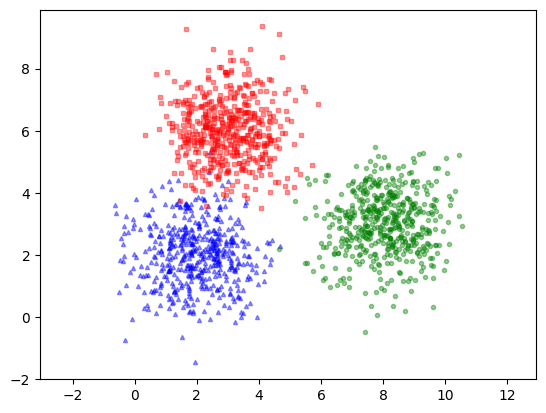

In [ ]:
kmeans_display(X, original_label)

In [ ]:
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]
def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers
def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) ==
        set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
      labels.append(kmeans_assign_labels(X, centers[-1]))
      new_centers = kmeans_update_centers(X, labels[-1], K)
      if has_converged(centers[-1], new_centers):
        break
      centers.append(new_centers)
      it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[1.97563391 2.01568065]
 [8.0410628  3.02094748]
 [2.99634182 6.03964618]]


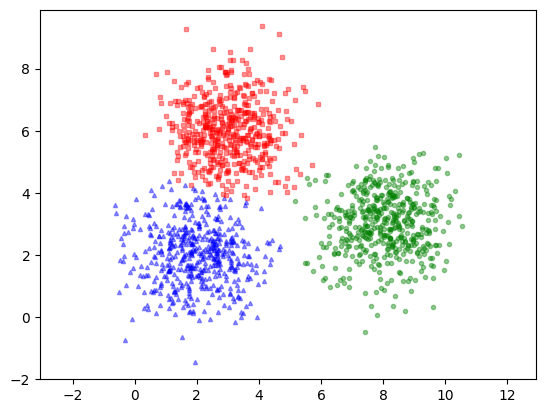

In [ ]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]


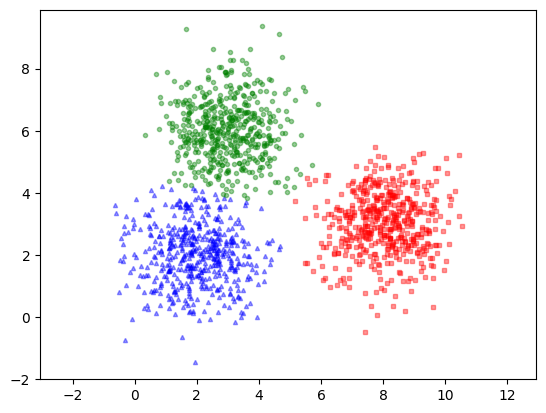

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

Mô hình KMeans trên hoạt động khá tốt, nó phân cụm dữ liệu thành ba cụm riêng biệt, nhưng ở các cụm màu xanh nước biển và xanh lá cây, vẫn có nhiều điểm dữ liệu ở gần nhau, nên khi phân tích mà chọn những điểm trên sẽ dễ bị sai, do đây là điểm dữ liệu nhiễu.